1. 2010년~2020년까지 장애인 고용 이행률

In [189]:
import pymysql
import matplotlib.pyplot as plt
import platform
import pandas as pd
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter

In [147]:
def main():
    conn=pymysql.connect(host='localhost', user='root', password='0813', db='project6', charset='utf8')
    cur=conn.cursor()
main()

In [148]:
def draw_graph(year,rate): # 그래프 그리는 함수
    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
            
    plt.figure(figsize=(15,7))
    plt.title('2010~2020년 장애인 고용 이행률 추이',size=17)
    plt.plot(year,rate,'r',marker='o')
    plt.xlabel('연도',size=15)
    plt.ylabel('이행률',size=15)
    plt.xticks(size=13)
    plt.yticks(size=13)
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


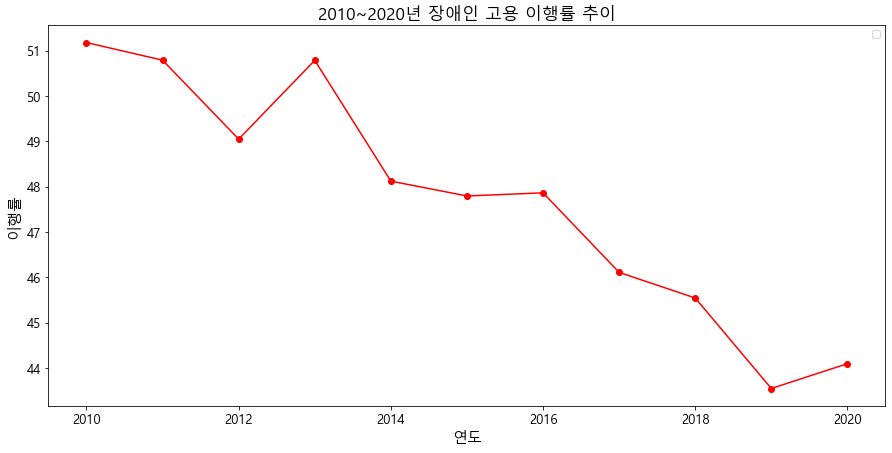

In [210]:
cur.execute('select * from new_duty_employment_state')
rows=cur.fetchall()

year_list=[]
rate_list=[]

for row in rows:
    year_list.append(row[0])
    rate_list.append(row[1])
    
draw_graph(year_list,rate_list)

2. 2021년 장애인 의무고용률과 기관별 비교

In [209]:
def draw_graph_bar(data,rate): # 그래프 그리는 함수   
    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
        
    plt.rcParams["figure.figsize"]=(15,7)
    data.plot(kind='bar')
    plt.plot(rate,'r--')
    #plt.legend()
    plt.title('2021년 기관별 장애인 고용률',size=17)
    plt.xlabel('기관',size=15)
    plt.ylabel('고용률',size=15)
    plt.xticks(rotation=80,size=13)
    plt.yticks(size=13)
    plt.show()

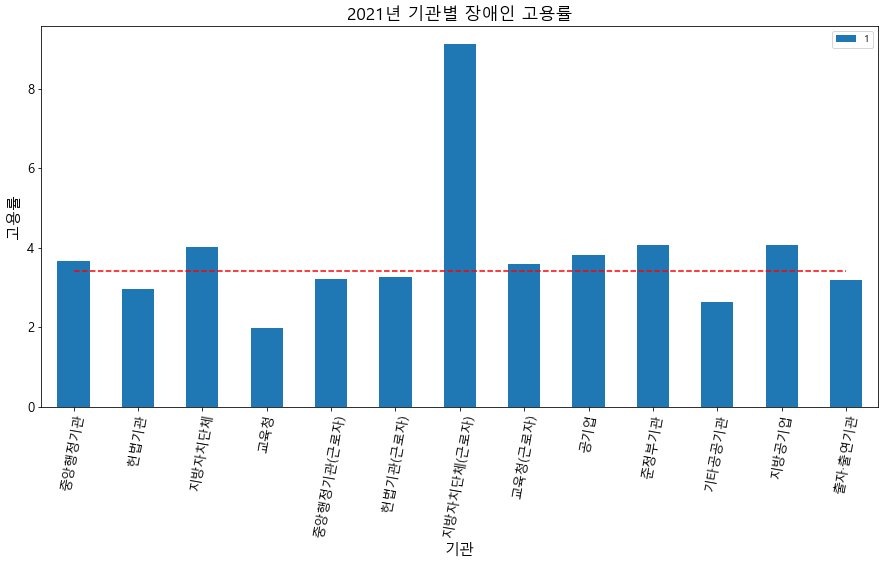

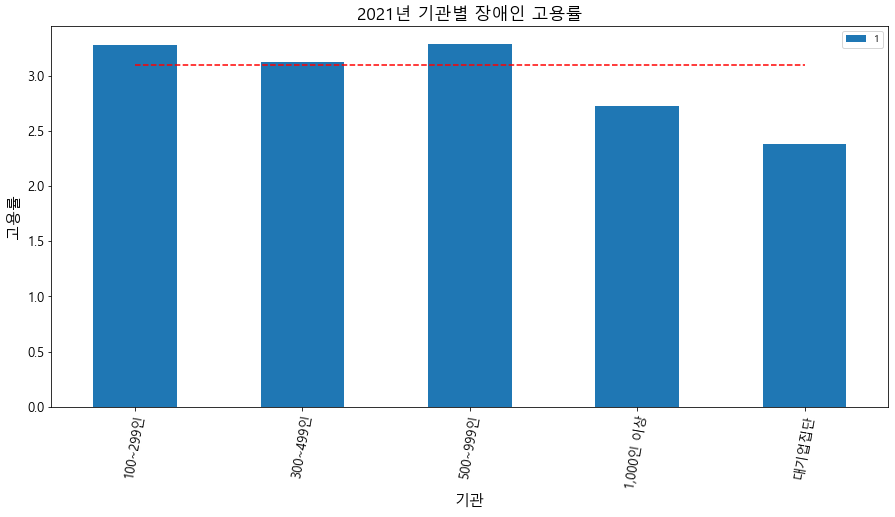

In [152]:
cur.execute('select * from new_duty_employment_company_state')
rows=cur.fetchall()

DF1=pd.DataFrame(rows)
DF1=DF1.set_index(0)
duty_rate1=[]
duty_rate2=[]

while True:
    if len(DF1[:13])==len(duty_rate1): break
    else: duty_rate1.append(3.4) # 2021년 정부 및 공공기관 장애인 의무고용률
    
while True:
    if len(DF1[14:])==len(duty_rate2): break
    else: duty_rate2.append(3.1) # 2021년 민간기업 장애인 의무고용률
    
draw_graph_bar(DF1[:13],duty_rate1)
draw_graph_bar(DF1[14:],duty_rate2)


3. 2020년 장애인고용 기업별 만족도

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


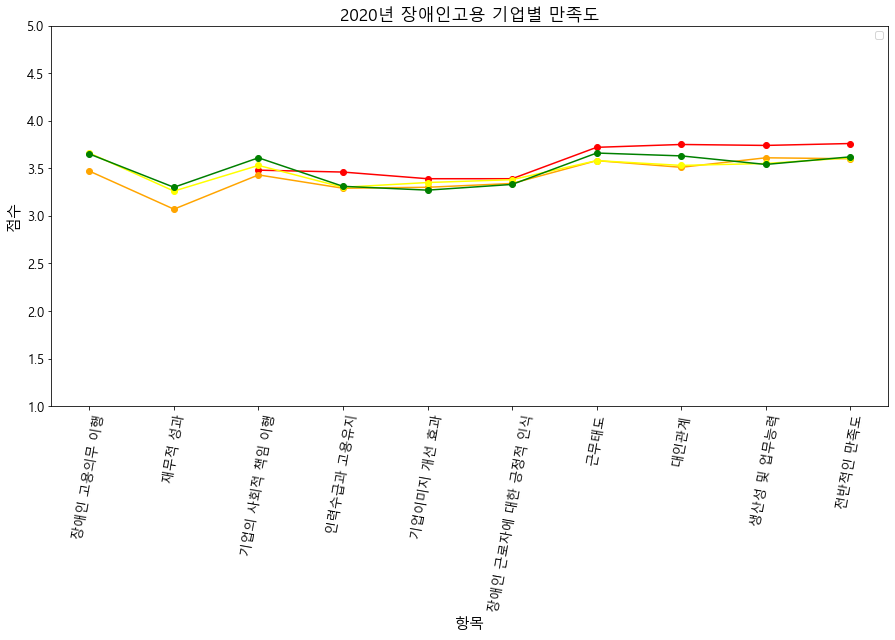

In [264]:
data1=[]
data2=[]
data3=[]

for i in range(1,4):
    cur.execute('select * from satisfaction_survey%s',i)
    rows=cur.fetchall()

    for row in rows:
        if i==1:data1.append(row)
        elif i==2:data2.append(row)
        elif i==3: data3.append(row)
        
sDF1=pd.DataFrame(data1)
sDF2=pd.DataFrame(data2)
sDF3=pd.DataFrame(data3)
sDF3

sDF3=sDF3.set_index(1)
sDF3=sDF3.iloc[:,1:]
sDF3=sDF3.replace('-',None)

draw_graph_survey(sDF3)

In [262]:
def draw_graph_survey(data): # 그래프 그리는 함수
    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
            
    plt.figure(figsize=(15,7))
    plt.title('2020년 장애인고용 기업별 만족도',size=17)
    plt.plot(data.index,data[2].values,'r',marker='o')
    plt.plot(data[3].values,'orange',marker='o')
    plt.plot(data[4].values,'yellow',marker='o')
    plt.plot(data[5].values,'green',marker='o')
    plt.ylim(1,5)
    plt.xlabel('항목',size=15)
    plt.ylabel('점수',size=15)
    plt.xticks(rotation=80,size=13)
    plt.yticks(size=13)
    plt.legend()
    plt.show()

(번외) 4. 장애인고용 부담금감면 연계고용사업장 정보 도급품목

{'세탁물': 21, '세탁': 20, '인쇄물': 10, '용역': 9, '서비스': 8, '인쇄': 6, '가공': 6, '원두': 6, '커피': 6, '복사': 5, '관리': 5, '화장지': 5, '산업': 5, '처리': 5, '제조': 4, '부품': 4, '전자부품': 4, '화장': 4, '지류': 4, '용지': 3, '종이컵': 3, '위생': 3, '제빵': 3, '마스크': 3, '포장': 3, '소독': 3, '의료': 3, '곡물': 3, '명함': 3, '자동차': 3}


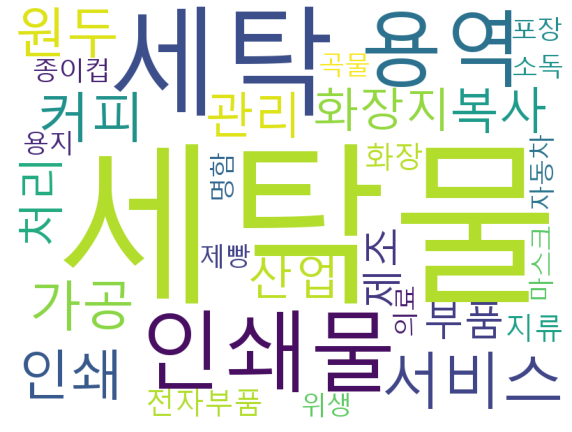

In [208]:
cur.execute('select * from new_information_workplace_charge_reduction')
rows=cur.fetchall()
data_list=[]
for row in rows:
    data_list.append(row[0])

draw_wordcloud(data_list)

- 비교적 간단한 업무가 주

In [206]:
def draw_wordcloud(data):
    okt=Okt()
    sentences_tag=[]
    not_list=['외','및','등','업','용','류'] # 의미 없다고 생각하는 단어 제거 리스트
    
    # 형태소 구분하여 리스트에 넣기
    for sentence in data:
        morph=okt.pos(sentence)
        sentences_tag.append(morph)

    noun_adj_list=[]
    # 명사와 형용사만 구분하여 리스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if (tag in ['Noun']) and (word not in not_list):
                noun_adj_list.append(word)
            
    # 형태소별 count
    counts=Counter(noun_adj_list)
    tags=counts.most_common(30) # 30개로 보여 주기로 정함 
    
    # wordCloud생성
    # 한글 깨지는 문제 해결하기위해 font_path 지정
    if platform.system()=='Windows':
        path=r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system()=='Darwin':  # Mac OS
        path=r'/System/Library/Fonts/AppleGothic'
    else:
        path=r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
    wc=WordCloud(font_path=path, background_color='white', width=800, height=600)
    print(dict(tags))
    
    # 그래프 한글 안 깨지게 폰트 설정
    if platform.system()=='Windows':
        plt.rc('font',family='Malgun Gothic')
    else:
        plt.rc('font',family='AppleGothic')
        
    cloud=wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()


In [ ]:
cur.close()
conn.close()